# Введение в Pytorch

## Часть 1 - тензоры, GPU, автодифференцирование

Александр Дьяконов, 2020-22


#### использованные материалы

* https://github.com/MLWhiz/data_science_blogs/blob/master/pytorch_guide/Pytorch%20Guide.ipynb
* https://d2l.ai/
* https://atcold.github.io/pytorch-Deep-Learning/
* семинары OzonMasters
* https://habr.com/ru/post/334380/
* https://github.com/andriygav/MachineLearningSeminars/
* https://uvadlc-notebooks.readthedocs.io/en/latest/index.html
* книга Joe Papa "PyTorch Pocket Reference" 2021, https://github.com/joe-papa/pytorch-book
* https://github.com/vahidk/EffectivePyTorch

**Pytorch** - открытый фреймворк для построения и использования динамических графов вычислений и глубокого обучения. Есть альтернативы: [TensorFlow](https://www.tensorflow.org/), [JAX](https://github.com/google/jax#quickstart-colab-in-the-cloud), [Caffe](http://caffe.berkeleyvision.org/). Изначально разрабатывался Fecebook’s AI Research Lab (FAIR). Вместе с функционалом Python удобен для экспериментов и разработки (минимум кода при максимуме возможностей). Наиболее важные для DL возможности:

- автоматическое дифференцирование,
- вычисления на базе многомерных матриц (тензоров) - очень похож на numpy,
- поддержка динамических вычислительных графов (создаются при работе),
- поддержка вычислений на GPU,
- есть полезные модули (например, torchvision).

Про установку см. на официальном сайте https://pytorch.org/get-started/locally/

In [ ]:
# from __future__ import print_function
import torch
import numpy as np

# что разумно сразу импортировать
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

In [ ]:
# для автодополнения
%config Completer.use_jedi = False

## Помощь, общие моменты, Colab

- по умолчанию вычисления на Colab используют CPU. Не забудьте включить GPU!
- есть платная версия Colab Pro (там больше возможностей, например более быстрые GPU).

In [ ]:
# основная помощь
torch.nn.Module?

In [ ]:
# + код функции
torch.nn.Module??

In [ ]:
# Проверка версии питона, пайторча и доступности видеокарты
import torch # заметьте, что не import pytorch
from platform import python_version
print(python_version()) # 3.8.8
print(torch.__version__) # 1.9.0
print (torch.cuda.is_available()) # True

3.8.8
1.9.0
True


In [ ]:
# COLAB - прикручиваем свой гуглдиск

from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)
% cd '/content/drive/My Drive/'

data_path = "/content/gdrive/My Drive/Colab Notebooks/name/"
train_ann_path = data_path + 'train.csv'

train_df = pd.read_csv(train_ann_path)
print(train_df.head())

# команды для bash пишутся с !
!ls /content/gdrive/My\ Drive/Colab\ Notebooks/name/

# ПОТОМ ПЕРЕДЕЛАТЬ!!!!!
# разархивируем, -q - не выводить логи
!unzip -q /content/gdrive/My\ Drive/Colab\ Notebooks/05.\ Real\ data/signs/train.zip -d ./

print(len(os.listdir('./train/')))
print(len(os.listdir('./test/')))

## Тензоры

Тензоры (torch.Tensor) - аналоги многомерных массивов пакета numpy, только
- могут располагаться на GPU (или поддерживать вычисления на нескольких CPU),
- могут быть элементами вычислительного графа и поддерживать автоматическое дифференцирование (об этом позже).

Это фундаментальная структура данных в Pytorch (с помощью неё будут храниться и обрабатываться объекты: тексты, сигналы изображения и батчи - наборы объектов). Могут в многомерном матричном виде хранить данные определённого типа.

**темы ниже**
* индексация
* получение одного из других
* размеры
* операции
* статистики
* связь с Numpy
* сохранение и загрузка
* примеры

### Тензоры: создание

In [ ]:
# создание тензора из списка (аналогично можно использовать кортеж, np.array)
# по умолчанию тензор создаётся на CPU, а тип его элементов определяется автоматически

x = torch.tensor([[1, 2, 3], [4, 5, 6]])

print(x, '\n',
      x.shape, '\n', # размер тензора
      x.dtype, '\n', # тип
      x.device, '\n', # где лежит
      x.type(), '\n', # тип
      x.dim(), '\n', # размерность
      x.size(), '\n', # размер тензора; .shape и .size() одно и то же
      x.numel()) # тип тензора

tensor([[1, 2, 3],
        [4, 5, 6]]) 
 torch.Size([2, 3]) 
 torch.int64 
 cpu 
 torch.LongTensor 
 2 
 torch.Size([2, 3]) 
 6


In [2]:
import torch

print (torch.Tensor([1, 2, 3]).dtype)  # Создаёт тензор с типом по умолчанию, как в  torch.get_default_dtype()
# torch.float32
print (torch.tensor([1, 2, 3]).dtype) # Пытается понять тип по данным
# torch.int64

torch.float32
torch.int64


In [ ]:
x = torch.FloatTensor(2, 3)
y = torch.Tensor(2, 3) # эквивалентно предыдущей записи (когда используется заглавная T)
print (x, '\n', y, '\n', x.data_ptr(), '\n', y.data_ptr()) # + где лежит в памяти

tensor([[0., 0., 0.],
        [0., 0., 0.]]) 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 
 2668314180416 
 2668314185344


In [ ]:
x = torch.cuda.FloatTensor(2, 3) # те тензоры были на CPU
print (x)


tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In [ ]:
# приведение типов

x = torch.IntTensor([1, 2]).float()
print (x)

x = torch.IntTensor([1, 2]).to(torch.float64)
print (x)

x = torch.IntTensor([1, 2]) + 0.0 #
print (x)

tensor([1., 2.])
tensor([1., 2.], dtype=torch.float64)
tensor([1., 2.])


Во всех функциях создания тензоров (ниже) есть параметры dtype - тип элементов тензора и device - где размещать тензор.

In [ ]:
# пустая матрица (тензор)
x = torch.empty(3, 5)
print(x)

# матрица из 1
x = torch.ones(3, 5)
print(x)

# матрица из 0
x = torch.zeros(3, 5)
print(x)

# матрица из 3.14
x = torch.full((3, 5), 3.14, dtype=torch.float)
print(x)

# единичная матрица (с единицами на главной диагонали)
x = torch.eye(3, 5)
print(x)

# случайная матрица c элементами равномерно распределёнными на [0, 1]
torch.manual_seed(123)
x = torch.rand(3, 5)
print(x)

# случайная матрица c нормально распределёнными элементами
torch.manual_seed(123)
x = torch.randn(3, 5)
print(x)

# случайная матрица c числами от 2 до 4 (не включая)
torch.manual_seed(123)
x = torch.randint(2, 4, (3, 5))
print(x)

# а вот так с распределением Коши
torch.manual_seed(123)
torch.empty((3, 5)).cauchy_()

tensor([[8.9082e-39, 5.9694e-39, 8.9082e-39, 1.0194e-38, 9.1837e-39],
        [4.6837e-39, 9.9184e-39, 9.0000e-39, 1.0561e-38, 1.0653e-38],
        [4.1327e-39, 8.9082e-39, 9.8265e-39, 9.4592e-39, 1.0561e-38]])
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[3.1400, 3.1400, 3.1400, 3.1400, 3.1400],
        [3.1400, 3.1400, 3.1400, 3.1400, 3.1400],
        [3.1400, 3.1400, 3.1400, 3.1400, 3.1400]])
tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.]])
tensor([[0.2961, 0.5166, 0.2517, 0.6886, 0.0740],
        [0.8665, 0.1366, 0.1025, 0.1841, 0.7264],
        [0.3153, 0.6871, 0.0756, 0.1966, 0.3164]])
tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969],
        [ 0.2093, -0.9724, -0.7550,  0.3239, -0.1085],
        [ 0.2103, -0.3908,  0.2350,  0.6653,  0.3528]])
tensor([[2, 3, 2, 2, 2],
        [2, 2, 3, 3, 2]

tensor([[ -0.4369, -23.8010,   0.2966,  -3.3384,  -0.0868],
        [  0.0693,   0.3427,   0.0986,   6.1324,  -5.5569],
        [  1.6738,  -3.2946,  -1.4137,  -1.2062,  -1.4264]])

In [ ]:
# "равномерные" массивы

x = torch.arange(0, 10, 2) # аналог np.arange
print(x)

x = torch.linspace(0, 10, 3) # аналог np.linspace
print(x)

x = torch.logspace(0, 1, 3) # аналог np.logspace
print(x)

tensor([0, 2, 4, 6, 8])
tensor([ 0.,  5., 10.])
tensor([ 1.0000,  3.1623, 10.0000])


In [ ]:
# сделать тензоры "по обоазцу" (использовать такой же тип и размеры)
torch.empty_like(x), torch.zeros_like(x), torch.ones_like(x)

(tensor([ 0.,  5., 10.]), tensor([0., 0., 0.]), tensor([1., 1., 1.]))

In [ ]:
# ещё о "случайных" функциях

x = torch.normal(mean=torch.tensor([0., 100.]), std=torch.tensor([1., 10.])) # выборка из нормальных распределений
print(x)

x = torch.randperm(10) # случайная перестановка
print(x)

tensor([ 0.2424, 94.9299])
tensor([6, 0, 9, 4, 5, 8, 3, 7, 2, 1])


In [3]:
# NEW

t = torch.randn((3, 4))
a = t.new_tensor([1, 2, 3])  # такие же type, device, но новые данные
b = t.new_empty((3, 4))      # такие же type, device, без инициализации
c = t.new_zeros((2, 3))      # такие же type, device, заполняем нулями

### Тензоры: индексация

Индексация аналогичная принятой в питоне, в частрости в numpy: [start:end:step].

In [ ]:
x = torch.randint(0, 10, (2, 5))

x[0], x[0, :], x[[0], :], x[:1, :]

(tensor([6, 5, 3, 9, 4]),
 tensor([6, 5, 3, 9, 4]),
 tensor([[6, 5, 3, 9, 4]]),
 tensor([[6, 5, 3, 9, 4]]))

In [ ]:
x[:,[1]], x[:, 1], x[:, -4]

(tensor([[5],
         [1]]),
 tensor([5, 1]),
 tensor([5, 1]))

In [ ]:
print (x[0, 0]) # это тензор 1х1
print (x[0, 0].item()) # а это уже отдельный элемент

tensor(6)
6


In [ ]:
print (x[x > 5]) # логическая индексация

print (x > 5) # логический тензор

tensor([6, 9, 6, 8])
tensor([[ True, False, False,  True, False],
        [ True, False,  True, False, False]])


In [2]:
# индексация

import torch

B = torch.LongTensor([[1, 2, 3], [4, 5, 6]])
idx1 = torch.LongTensor([0, 2])
idx2 = torch.BoolTensor([False, True, True])

print (B)
print (B[:, idx1])
print (B[:, idx2])

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 3],
        [4, 6]])
tensor([[2, 3],
        [5, 6]])


### Тензоры: получение одного из других

Есть много способов копирования тензоров. Следует учитывать, что при использовании `clone()` копия остаётся в графе вычислений. При использовании `copy_()` такого не происходит. `detach` - убирает информацию связанную с вычислительным графом из объекта.

In [ ]:
# копирование

a = torch.tensor([[1, 2], [3, 4]])

b = a.new_tensor(a)
b = a.clone().detach()
b = torch.empty_like(a).copy_(a)
b = torch.tensor(a)
b = a.detach().clone() # лучше так

<ipython-input-8-4bb2d404a7e5>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  b = a.new_tensor(a)
<ipython-input-8-4bb2d404a7e5>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(a)


In [ ]:
# клонируем - получаем другой идентичный тензор

x = torch.tensor([[1, 2], [3, 4]])
y = x.clone()
# print (id(x.storage()) == id(y.storage()))
x[0, 0] = 10
print ('clone\n', x, '\n', y)

# транспонируем - не происходит копирования, используется та же память
xt = x.t()
x[0, 0] = 30
print ('t()\n', x, '\n', xt)

clone
 tensor([[10,  2],
        [ 3,  4]]) 
 tensor([[1, 2],
        [3, 4]])
t()
 tensor([[30,  2],
        [ 3,  4]]) 
 tensor([[30,  3],
        [ 2,  4]])


In [ ]:
# матрица такого же размера
y = torch.randn_like(x, dtype=torch.float)
print(y)

y = torch.ones_like(x) # такие же размеры, но из единиц

tensor([[-0.0283,  1.4220],
        [-0.3886, -0.8903]])


In [ ]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[2, 2], [2, 2]])

z = torch.stack((x, y)) # состыковка тензоров (по умолчанию dim=0)
print (z, '\n', z.shape)

x, y = z.unbind(dim=0) # разстыковка тензоров
print (x, '\n', y)

x, y = z.unbind(dim=1) # разстыковка тензоров
print (x, '\n', y)

tensor([[[1, 2],
         [3, 4]],

        [[2, 2],
         [2, 2]]]) 
 torch.Size([2, 2, 2])
tensor([[1, 2],
        [3, 4]]) 
 tensor([[2, 2],
        [2, 2]])
tensor([[1, 2],
        [2, 2]]) 
 tensor([[3, 4],
        [2, 2]])


In [ ]:
# конкатенация по 0 и 1 размерностям
# cat в отличие от stack использует существующие размерности
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[2, 2], [2, 2]])
torch.cat([x, y], axis=1), torch.cat([x, y], axis=0)

(tensor([[1, 2, 2, 2],
         [3, 4, 2, 2]]),
 tensor([[1, 2],
         [3, 4],
         [2, 2],
         [2, 2]]))

In [ ]:
# создание фиктивной размерности - в какую позицию вставлять фиктивную
x = torch.tensor([[1, 2], [3, 4]])
print (x.unsqueeze(dim=0).shape, x.unsqueeze(dim=1).shape, x.unsqueeze(dim=2).shape)
# другой способ ~ np.newaxis
print (x[None, :, :].shape, x[:, None, :].shape, x[:, :, None].shape)

# ??? посмотреть общую память

torch.Size([1, 2, 2]) torch.Size([2, 1, 2]) torch.Size([2, 2, 1])
torch.Size([1, 2, 2]) torch.Size([2, 1, 2]) torch.Size([2, 2, 1])


In [ ]:
# конкатенация по 2-й размерности
z = torch.cat([x.unsqueeze(dim=2), y.unsqueeze(dim=2)], axis=2) # или просто использовать stack - см. выше
print(z)

# или эквивалентно и проще
z = torch.stack((x, y), dim=2)
print(z)

tensor([[[1, 3],
         [2, 4]],

        [[2, 2],
         [2, 2]]])
tensor([[[1, 3],
         [2, 4]],

        [[2, 2],
         [2, 2]]])


In [ ]:
# удаляем единичные размеры
torch.empty(3, 1, 2, 1).squeeze().shape

torch.Size([3, 2])

In [ ]:
x = torch.tensor([[1, 2, 3, 4, 5], [0, 0, 0, 0, 0]])

z = torch.chunk(x, chunks=3, dim=1) # делим на части
print (z)

z = torch.split(x, [2, 3], dim=1) # ещё способ разделения с указанием размеров - на части каких размеров делим
print (z)

(tensor([[1, 2],
        [0, 0]]), tensor([[3, 4],
        [0, 0]]), tensor([[5],
        [0]]))
(tensor([[1, 2],
        [0, 0]]), tensor([[3, 4, 5],
        [0, 0, 0]]))


In [ ]:
# 2do torch.gather(z, dim=1)

In [ ]:
x = torch.tensor([[1, 2, 3, 4, 5], [0, 0, 0, 0, 0]])
indices = torch.tensor([0, 2, 3])
torch.index_select(x, 1, indices) # выбираем по указанному индексу

tensor([[1, 3, 4],
        [0, 0, 0]])

In [ ]:
x = torch.tensor([[1, 2, 3, 4, 5], [0, 0, 10, 0, 0]])
mask = x.ge(1.5) # x > 1.5
torch.masked_select(x, mask) # выбираем по указанной маске

tensor([ 2,  3,  4,  5, 10])

In [ ]:
x = torch.tensor([[1, 2, 3, 4, 5], [0, 0, 0, 0, 0]])
torch.narrow(x, dim=1, start=1, length=3) # в какой-то размерности вырезать подтензор

tensor([[2, 3, 4],
        [0, 0, 0]])

In [ ]:
torch.nonzero(x) # индексы ненулевых элементов

tensor([[0, 0],
        [0, 1],
        [0, 2],
        [0, 3],
        [0, 4]])

In [ ]:
x = torch.tensor([[1, 2, 3, 4, 5], [0, 0, 0, 0, 0]])
torch.take(x, torch.tensor([0, 2, 5])) # набрать тензор из указанных элементов

tensor([1, 3, 0])

In [ ]:
# по условию выбираем элементы из 1го или 2го тензора
torch.where(torch.tensor([[1, 2, 2], [1, 2, 1]]) == 1, torch.ones(2, 3), torch.zeros(2, 3))

tensor([[1., 0., 0.],
        [1., 0., 1.]])

In [4]:
# повтор тензора

x = torch.tensor([1, 2])

print (x)

print (x.repeat(3, 2))

print (x.repeat(2, 1, 2).shape) # Обратите внимание! Тут нетривиальный результат!

tensor([1, 2])
tensor([[1, 2, 1, 2],
        [1, 2, 1, 2],
        [1, 2, 1, 2]])
torch.Size([2, 1, 4])


# "Смежность" тензора

Разберёмся, как хранятся в памяти двухмерные тензоры.

In [ ]:
import torch
H = torch.rand((10000, 10000))

In [ ]:
%%time
s = torch.sum(H, axis=1) # суммы строк быстрее

CPU times: user 36.8 ms, sys: 1.87 ms, total: 38.6 ms
Wall time: 85.7 ms


In [ ]:
%%time
s = torch.sum(H, axis=0) # суммы столбцов медленнее

CPU times: user 94.6 ms, sys: 0 ns, total: 94.6 ms
Wall time: 106 ms


Они по умолчанию лежат "по стокам" - такое размещение и называется "смежным". Однако, например, в случае транспонирования тензора, данные не копируются, Pytorch просто запоминает, что теперь размещение "несмежное".

In [ ]:
x = torch.randn(3, 2)
print (x.is_contiguous()) # contiguous
y = torch.transpose(x, 0, 1)
print (x.is_contiguous()) # НЕ contiguous
x[0, 0] = 42  # но они делят память
print(y[0,0]) # 42

True
True
tensor(42.)


### Тензоры: размеры

Можно менять "представление" тензора с помощью **view**, фактически это изменение размеров, но реально данные не перемещаются, pytorch просто запоминает, что тензор, заданный элементами, лежащими в определённой области памяти, имеет другрой размер.# inplace
y.add_(x)

При использовании **view** может выдаваться сообщение об ошибке - если нельзя использовать эту область памяти (можно тогда сделать предварительно **.contiguous()**).

При **reshape()** тензор может копироваться.

In [ ]:
x = torch.arange(8)

x.view(4, 2), x.view(2, -1) # если указывается размер (-1), то он определяется автоматически, так чтобы сохранить число элементов тензора

(tensor([[0, 1],
         [2, 3],
         [4, 5],
         [6, 7]]),
 tensor([[0, 1, 2, 3],
         [4, 5, 6, 7]]))

In [ ]:
x # заметим, что сам тензор не поменялся

tensor([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
# чтобы размер поменялся надо выполнить присваивание
x = x.view(4, 2)

print (x)

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7]])


In [ ]:
# как хранятся данные, где следующий элемент по каждой из разметностей
print (x, x.storage(), x.stride(), x.t().stride())

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7]])  0
 1
 2
 3
 4
 5
 6
 7
[torch.LongStorage of size 8] (2, 1) (1, 2)


In [ ]:
# С помощью permute можно переставлять размерности тензора, например транспозиция матрицы выполняется так:
x.permute(1, 0) # torch.transpose(x, dim0=0, dim1=1)

tensor([[0, 2, 4, 6],
        [1, 3, 5, 7]])

In [ ]:
z = torch.rand(1, 2, 3, 4)
z = z.permute(0, 3, 1, 2) # NxHxWxC -> NxCxHxW
z.shape

torch.Size([1, 4, 2, 3])

In [ ]:
# другие способы транспонирования:
x.transpose(0, 1), x.t(), x.t_()

(tensor([[0, 2, 4, 6],
         [1, 3, 5, 7]]),
 tensor([[0, 2, 4, 6],
         [1, 3, 5, 7]]),
 tensor([[0, 2, 4, 6],
         [1, 3, 5, 7]]))

In [ ]:
# векторизация
x.flatten() # ещё вариант .view(-1)

tensor([0, 2, 4, 6, 1, 3, 5, 7])

In [ ]:
# view vs reshape
x = torch.rand(2, 2)

a = x.view(4)
b = x.view(2, 1, -1)

y  = x.reshape(1, 4)

print (x.size(), a.size(), b.size(), y.size())

torch.Size([2, 2]) torch.Size([4]) torch.Size([2, 1, 2]) torch.Size([1, 4])


In [ ]:
# view vs reshape
x = torch.arange(4*10*2).view(4, 10, 2)
y = x.permute(2, 0, 1)

# View - работает только на contiguous tensors (которые "правильно" последовательно лежат в памяти)
print('смежность', x.is_contiguous())
print('вытягиваем', x.view(-1))

# Reshape - работает всегда (старается выдать view, если не получается делает копию данных)
print('смежность', y.is_contiguous())
try:
    print('вытягиваем', y.view(-1))
except RuntimeError as e:
    print('ошибка', e)
print('решейпим', y.reshape(-1))
print('делаем смежным и решейпим', y.contiguous().view(-1))

смежность True
вытягиваем tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79])
смежность False
ошибка view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.
решейпим tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
        36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70,
        72, 74, 76, 78,  1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27,
        29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63,
        65, 67, 69, 71, 73, 75, 77, 79])
делаем смежным и решейпим tensor([ 0,  2,  4,  6,  8, 10, 12, 14,

Для справки: в Pytorch-е тензоры хранятся в формате  [channel,
height, width], в других системах чаще [height, width,
channel].

### Тензоры: операции

аналогичны операциям в numpy, большинство операций выполняются поэлементно.

поддерживаются операции линейной алгебры, многие из которых взяты из библиотек Basic Linear Algebra Subprograms (BLAS) и Linear Algebra Package (LAPACK). Полный список операций линейной алгебры: https://pytorch.org/docs/stable/torch.html#blas-and-lapack-operations

В inplace-операциях используется черта, в этом случае операция выполняется на данном тензоре:

In [ ]:
x = torch.tensor([[1, 2], [3, 4]])

# заполнение
x.fill_(3) # черта - признак выполнения на данном тензоре
print (x)

# обнуление
x.zero_()
print (x)

tensor([[3, 3],
        [3, 3]])
tensor([[0, 0],
        [0, 0]])


In [ ]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[2, 2], [2, 2]])
v = torch.tensor([1, 2])

In [ ]:
# сложение
print (x + y,
       x.add(y))

# черта означает inplace-операцию - меняется первый тензор:
x.add_(y)

# inplace-операции специально "запрятаны", так как при их использовании могут быть проблемы при распространении градиента

tensor([[5, 6],
        [7, 8]]) tensor([[5, 6],
        [7, 8]])


tensor([[5, 6],
        [7, 8]])

In [ ]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[2, 2], [2, 2]])

# поэлементное умножение
x * y, x.mul(y), torch.mul(x, y)

(tensor([[2, 4],
         [6, 8]]),
 tensor([[2, 4],
         [6, 8]]),
 tensor([[2, 4],
         [6, 8]]))

Матричное умножение можно сделать по-разному:

* torch.matmul - операция определена над тензорами, можно указывать размерность для умножения (см)
* torch.mm - обычное матричное умножение, но без приведения размеров (broadcasting)
* torch.bmm - матричное умножение с поддержкой батчей: $(b\times n\times m) \cdot  (b\times m\times p) = b\times n\times p$.

In [ ]:
# матричное умножение
x @ y, x.mm(y), x.matmul(y), torch.matmul(x, y)

(tensor([[ 6,  6],
         [14, 14]]),
 tensor([[ 6,  6],
         [14, 14]]),
 tensor([[ 6,  6],
         [14, 14]]),
 tensor([[ 6,  6],
         [14, 14]]))

In [ ]:
x = torch.tensor([[1, 1], [0, 1]])
torch.linalg.multi_dot((x, x, x)), torch.matrix_power(x, 3) # перемножить несколько матриц / возвести в степень

(tensor([[1, 3],
         [0, 1]]),
 tensor([[1, 3],
         [0, 1]]))

In [ ]:
x = torch.tensor([[1, 1], [0, 1]])
y = torch.tensor([[1, 1], [1, 1]])
torch.addmm(y, x, x) # y + x*x

tensor([[2, 3],
        [1, 2]])

In [ ]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[2, 2], [2, 2]])
v = torch.tensor([1, 2])

print (torch.dot(v, v), v.dot(v)) # скалярное умножение
torch.dot(x.view(-1), y.view(-1))

tensor(5) tensor(5)


tensor(20)

In [ ]:
torch.mv(x, v), x.mv(v)  # умножение на вектор

(tensor([ 5, 11]), tensor([ 5, 11]))

In [1]:
# специфика умножения

import torch
A = torch.rand(4,4)
x = torch.rand(4)

print (torch.mv(A, x)) # torch.mm(A, x) - ошибка
print (torch.mm(A, x.view(4, 1))) # torch.mv(A, x.view(4, 1)) - ошибка

tensor([0.8222, 0.4081, 0.8190, 0.6435])
tensor([[0.8222],
        [0.4081],
        [0.8190],
        [0.6435]])


In [ ]:
v.addmv(x, v) # vector + matrix @ vector

tensor([ 6, 13])

In [ ]:
x = torch.eye(2)
v = torch.tensor([1, 2])

torch.addr(x, v, v), v.T @ v # matrix + vector * vector.T (внешнее произведение)

(tensor([[2., 2.],
         [2., 5.]]),
 tensor(5))

In [ ]:
x = torch.tensor([[1., 2.], [3., 4.]])

torch.eig(x), torch.det(x), torch.logdet(x), torch.inverse(x)  # собственные значения, определители и обратная матрица

(torch.return_types.eig(
 eigenvalues=tensor([[-0.3723,  0.0000],
         [ 5.3723,  0.0000]]),
 eigenvectors=tensor([])),
 tensor(-2.0000),
 tensor(nan),
 tensor([[-2.0000,  1.0000],
         [ 1.5000, -0.5000]]))

In [ ]:
x = torch.tensor([[1., 2], [3, 4]])
v = torch.tensor([[1., 2]]).T

a, lu = torch.solve(v, x) # решение матричного уравнения
print (a, lu)
# проверка
print (x @ a)

tensor([[0.0000],
        [0.5000]]) tensor([[3.0000, 4.0000],
        [0.3333, 0.6667]])
tensor([[1.],
        [2.]])


<ipython-input-56-a17911f8d9bf>:4: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:760.)
  a, lu = torch.solve(v, x) # решение матричного уравнения


In [ ]:
torch.svd(x), torch.torch.pca_lowrank(x, niter=1) # SVD / PCA

(torch.return_types.svd(
 U=tensor([[-0.4046, -0.9145],
         [-0.9145,  0.4046]]),
 S=tensor([5.4650, 0.3660]),
 V=tensor([[-0.5760,  0.8174],
         [-0.8174, -0.5760]])),
 (tensor([[ 0.7071,  0.7071],
          [-0.7071,  0.7071]]),
  tensor([2.0000e+00, 1.4426e-15]),
  tensor([[-0.7071,  0.7071],
          [-0.7071, -0.7071]])))

In [ ]:
torch.div(x, y) # деление

tensor([[1., 2.],
        [3., 4.]])

In [ ]:
torch.neg(x) # унарный минус

tensor([[-1., -2.],
        [-3., -4.]])

In [ ]:
torch.reciprocal(x) # 1/x поэлементно

tensor([[1.0000, 0.5000],
        [0.3333, 0.2500]])

In [ ]:
torch.true_divide(x, y)

tensor([[1., 2.],
        [3., 4.]])

In [ ]:
x.type(torch.DoubleTensor).log() # приводим тип - иначе не сработает log

tensor([[0.0000, 0.6931],
        [1.0986, 1.3863]], dtype=torch.float64)

In [ ]:
x.pow(2), x**2

(tensor([[ 1.,  4.],
         [ 9., 16.]]),
 tensor([[ 1.,  4.],
         [ 9., 16.]]))

In [ ]:
x.exp(), x.log(), x.expm1(), x.log1p(), x.log2()

(tensor([[ 2.7183,  7.3891],
         [20.0855, 54.5981]]),
 tensor([[0.0000, 0.6931],
         [1.0986, 1.3863]]),
 tensor([[ 1.7183,  6.3891],
         [19.0855, 53.5981]]),
 tensor([[0.6931, 1.0986],
         [1.3863, 1.6094]]),
 tensor([[0.0000, 1.0000],
         [1.5850, 2.0000]]))

In [ ]:
x = torch.tensor([[3, 1], [2, 3]])
print(3 * x.add(2)) # смотри на порядок операций
print(x * x.add(2)) # смотри на порядок операций
print(x * x.add_(2)) # смотри на порядок операций

tensor([[15,  9],
        [12, 15]])
tensor([[15,  3],
        [ 8, 15]])
tensor([[25,  9],
        [16, 25]])


In [ ]:
# как распределяется память - ПРОВЕРИТЬ В ПОСЛЕДНЕЙ ВЕРСИИ?????

x = torch.Tensor([1, 2])
y = torch.Tensor([1, 1])
z = torch.Tensor([0, 2])

print (x + y - z) # два промежуточных тензора будут созданы.
print (x.add(y).sub_(z)) # один промежуточный тензор.
print (x.add_(y).sub_(z)) # не будет создано промежуточных тензоров
print(x) # поменяется

tensor([2., 1.])
tensor([2., 1.])
tensor([2., 1.])
tensor([2., 1.])


### Тензоры: статистики

In [ ]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[2, 2], [2, 2]])

In [ ]:
# можно последовательно выполнять операции, например, сначала sum, потом item
# item - "выцепляет" элемент
torch.sum(x), x.sum(), x.sum().item(), x.sum(axis=0), x.sum(axis=1)

(tensor(10), tensor(10), 10, tensor([4, 6]), tensor([3, 7]))

In [ ]:
x.sum(axis=1, keepdim=True) # keepdim - тензор остаётся двумерным

tensor([[3],
        [7]])

In [ ]:
torch.prod(x), x.prod() # произведение элементов

(tensor(24), tensor(24))

In [ ]:
torch.max(x), x.max(), x.max().item(), x.max(axis=0), x.max(axis=1)

(tensor(4),
 tensor(4),
 4,
 torch.return_types.max(
 values=tensor([3, 4]),
 indices=tensor([1, 1])),
 torch.return_types.max(
 values=tensor([2, 4]),
 indices=tensor([1, 1])))

In [ ]:
maxes, indexes = x.max(axis=0)
maxes, indexes # одновременно получаем max и argmax - часто используется

(tensor([3, 4]), tensor([1, 1]))

In [ ]:
x.argmax(), x.argmin(dim=0)

(tensor(3), tensor([0, 0]))

In [ ]:
x = torch.tensor([[1., 2.], [3., 4.]])
y = torch.tensor([[2., 2.], [2., 2.]])

print (torch.dist(x, y, p=4)) # p-норма
print(x.norm())

tensor(2.0598)
tensor(5.4772)


In [ ]:
x.mean(), x.median(), x.mode()

(tensor(2.5000),
 tensor(2.),
 torch.return_types.mode(
 values=tensor([1., 3.]),
 indices=tensor([0, 0])))

In [ ]:
x.argsort()

tensor([[0, 1],
        [0, 1]])

In [ ]:
x = torch.tensor([2,1,2,3,0,4,3])
x.topk(k=2), x.kthvalue(k=2)

(torch.return_types.topk(
 values=tensor([4, 3]),
 indices=tensor([5, 3])),
 torch.return_types.kthvalue(
 values=tensor(1),
 indices=tensor(1)))

In [ ]:
x = torch.tensor([1., 2., 3.])
torch.std_mean(x), torch.var_mean(x) # сразу вычислить СКО / дисперсию и среденее

((tensor(1.), tensor(2.)), (tensor(1.), tensor(2.)))

In [ ]:
torch.unique(torch.tensor([1,2,1,3,3,3,0])) # уникальные элементы

tensor([0, 1, 2, 3])

In [ ]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[2, 2], [2, 2]])

x == y, torch.eq(x, y), x == x, torch.eq(x, x)

(tensor([[False,  True],
         [False, False]]),
 tensor([[False,  True],
         [False, False]]),
 tensor([[True, True],
         [True, True]]),
 tensor([[True, True],
         [True, True]]))

In [ ]:
torch.allclose(x, y) # равенство с некоторой точностью

False

In [ ]:
x >= y, torch.ge(x, y), x > y, torch.gt(x, y), x <= y, torch.le(x, y), x < y, torch.lt(x, y),

(tensor([[False,  True],
         [ True,  True]]),
 tensor([[False,  True],
         [ True,  True]]),
 tensor([[False, False],
         [ True,  True]]),
 tensor([[False, False],
         [ True,  True]]),
 tensor([[ True,  True],
         [False, False]]),
 tensor([[ True,  True],
         [False, False]]),
 tensor([[ True, False],
         [False, False]]),
 tensor([[ True, False],
         [False, False]]))

In [ ]:
x = 1 / torch.tensor([[1, 0], [3, 4]])
x, torch.isinf(x), torch.isfinite(x), torch.isnan(x)

(tensor([[1.0000,    inf],
         [0.3333, 0.2500]]),
 tensor([[False,  True],
         [False, False]]),
 tensor([[ True, False],
         [ True,  True]]),
 tensor([[False, False],
         [False, False]]))

###  Тензоры: приведение размеров

- когда 2 размерности совпадают
- когда одна размерность равна 1

не надо вручную приводить размеры "размножая тензор".

In [ ]:
# приведение размеров

x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([10, 20])

x + y

tensor([[11, 22],
        [13, 24]])

In [ ]:
# приведение размеров

x = torch.tensor([[1, 2]])
y = torch.tensor([[0], [3]])
print (x, x.shape)
print (y, y.shape)
z = x + y
print (z, z.shape)

tensor([[1, 2]]) torch.Size([1, 2])
tensor([[0],
        [3]]) torch.Size([2, 1])
tensor([[1, 2],
        [4, 5]]) torch.Size([2, 2])


In [ ]:
# приведение типов - а есть ещё x.type_as(y)

x =  torch.FloatTensor(2, 3) + torch.IntTensor(2, 3)
x

tensor([[0.0000e+00, 0.0000e+00, 1.8754e+28],
        [1.6244e-07, 2.1865e+23, 1.0471e-11]])

In [ ]:
# приведение типов - а есть ещё x.type_as(y)

torch.IntTensor(2, 3) + 0.0

tensor([[0., 0., 0.],
        [0., 0., 0.]])

### Тензоры: связь с Numpy

In [ ]:
# Перевод тензора в numpy-массив осуществляется следующим образом

x = torch.tensor([[1, 2], [3, 4]])
x.numpy()
y = x.cpu().detach().numpy() # правильнее так
print (y)

[[1 2]
 [3 4]]


In [ ]:
x[0, 0] = 10
print (y)

[[10  2]
 [ 3  4]]


In [ ]:
x.tolist() # если хотим просто в список

[[1, 2], [3, 4]]

In [ ]:
# из numpy.array в pytorch-тензор
torch.from_numpy(np.ones((2, 2)))

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64)

In [ ]:
# Посмотрим, как изменения массива в numpy атоматичесменяет тензор

import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
c = torch.Tensor(a)
print(a)
print(b)
print(c)
np.add(a, 10, out=a)
# если использовать конструкцию a = a + 1, то изменения тензора не произойдёт
print(a)
print(b)
print(c) # а тут нет

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.])
[11. 11. 11. 11. 11.]
tensor([11., 11., 11., 11., 11.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.])


In [ ]:
# При переводе в numpy необходимо, чтобы тензор находился в CPU, а не на GPU.

x = torch.tensor([1, 2], device='cuda')
print (x.cpu().numpy())
print (x.numpy()) # будет ошибка

[1 2]


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

### Тензоры: сохранение и загрузка

In [ ]:
# сохранение и загрузка тензоров
torch.save(x, 'x-file')
x2 = torch.load("x-file")
x2

tensor([1., 2., 3.])

In [ ]:
torch.save([x, y], 'x-files')
x2, y2 = torch.load('x-files')
(x2, y2)

(tensor([1., 2., 3.]),
 tensor([[ 3.,  0.],
         [ 3., 12.]], requires_grad=True))

In [ ]:
mydict = {'x': x, 'y': y}
torch.save(mydict, 'mydict')
mydict2 = torch.load('mydict')
mydict2

{'x': tensor([1., 2., 3.]),
 'y': tensor([[ 3.,  0.],
         [ 3., 12.]], requires_grad=True)}

## Тензоры: примеры

In [ ]:
# OHE
target = torch.tensor([0,3,2,2,0])
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# матрица -> вектор
x = torch.rand(10, 20, 30, 40)
print (x.view(-1, 20, 30*40).shape)
print (torch.flatten(x, 2).shape) # после какой размерности вытягивать (это аналог reshape!)

torch.Size([10, 20, 1200])
torch.Size([10, 20, 1200])


In [ ]:
# нормировка

a_norm = a / a.norm(dim=1)[:, None]

## GPU

Тензоры и вычислительные графы (нейросети) могут находиться как на CPU, так и на GPU (ещё на TPU). Переменные и модели на разных устройствах не видят друг друга! Поэтому их надо перенести на один вычислитель.

На GPU вычисления производятся существенно быстрее из-за параллелизма.

Такие записи эквивалентны для обозначения устройства-GPU:

- device="cuda"
- device=torch.device("cuda")
- device="cuda:0"
- device=torch.device("cuda:0")

In [ ]:
import torch
# самая популярная конструкция, определяющая доступное для хранения тензоров/нейросетей устройство
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Перенос тензора / нейросети на устройство осуществляется с помощью инструкции ```to```.

In [ ]:
m.to(device) # перенос на доступное устройство

In [ ]:
# информация о GPU

print('Using device:', device)
print()

if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')


Using device: cuda:0

Tesla T4
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [ ]:
# чистка памяти

gc.collect() # Python thing

with torch.no_grad(): # работает с этой инструкцией
    torch.cuda.empty_cache()

In [ ]:
import time
x = torch.randn(5000, 5000)

# CPU
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

# GPU
start_time = time.time()
x = x.to("cuda:0")
end_time = time.time()
print(f"CPU2GPU time: {(end_time - start_time):6.5f}s")

x = x + 0.0 # просто первая операция
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"GPU time: {(end_time - start_time):6.5f}s")

CPU time: 0.77800s
CPU2GPU time: 0.09263s
GPU time: 0.00803s


In [ ]:
# инициализация генератора псевдослучайных чисел

def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available(): # для GPU отдельный seed
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

set_seed(42)

# есть стохастические операции на GPU
# сделаем их детерминированными для воспроизводимости
torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

In [ ]:
x.cuda()
x.cpu()
x.is_cuda
z.to("cpu", torch.double)

Ниже эксперименты со временем

In [ ]:
x = torch.randn((1000, 1000))
y = torch.randn((1000, 1000))

In [ ]:
%%time
z = x @ y

Wall time: 11 ms


In [ ]:
%%time
x = x.cuda()
y = y.cuda() # на перебрасывание тоже нужно время
z = x @ y

Wall time: 4.96 ms


In [ ]:
# сколько используется памяти
def print_peak_memory(prefix, device):
    print(f"{prefix}: {torch.cuda.max_memory_allocated(device) // 1e6}MB ")

device="cuda"
print_peak_memory("используется сейчас:", device)

используется сейчас:: 201.0MB 


## Авто дифференцирование (AutoGrad)

Сначала приведём пример автоматического дифференцирования, мы зададим функцию $y = sin(x) \cdot (sin^2(x) + cos^2(x)$, а Pytorch автоматически вычислит её производную.

backward - функция "обратного прохода", именно при её вызове автоматически считаются производные по всем переменным, у которых requires_grad=True.

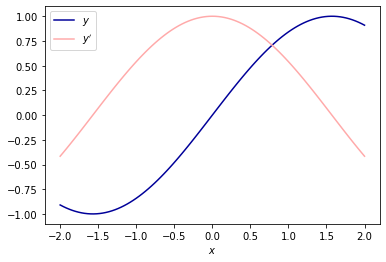

In [ ]:
from torch.autograd import Variable

x = torch.linspace(-2, 2, 101, dtype=torch.float32, requires_grad=True)
# x = Variable(x, requires_grad=True) # можно ли проще? - да!
y = torch.sin(x) * (torch.sin(x) ** 2 + torch.cos(x) **2)
# здесь это прямой проход
# дальще часто будем определять класс с методом y.forward()
y.sum().backward() # превращаем в число (только от таких фукнций берётся градиент)
g = x.grad # взятие производных в каждой точке

plt.plot(x.detach().numpy(), y.detach().numpy(), c='#000099', label='$y$')
plt.plot(x.detach().numpy(), g.detach().numpy(), c='#FFAAAA', label="$y'$")
plt.xlabel('$x$')
plt.legend()

In [ ]:
x = torch.linspace(-2, 2, 3, dtype=torch.float32) # над целочисленными тензорами нельзя взять производную
x.requires_grad_() # как указать, что хотим вычислять производную
x

tensor([-2.,  0.,  2.], requires_grad=True)

In [ ]:
import torch
from torch.autograd import Variable

#x = Variable(torch.Tensor([1]), requires_grad=True)
#y = Variable(torch.Tensor([2]), requires_grad=True)
#z = Variable(torch.Tensor([3]), requires_grad=True)

x = torch.tensor([1.], requires_grad=True)
y = torch.tensor([2.], requires_grad=True)
z = torch.tensor([3.], requires_grad=True)

f = (x + y) * (y - z)

f.backward()
x.grad, y.grad, z.grad

(tensor([-1.]), tensor([2.]), tensor([-3.]))

In [ ]:
from torchviz import make_dot

make_dot(f)

ModuleNotFoundError: No module named 'torchviz'

In [ ]:
f = (x + y) * (y - z)
z = f.detach()
print (f.requires_grad, z.requires_grad)

with torch.no_grad(): # когда просто нужен прямой проход - и не надо считать градиенты
    f = (x + y) * (y - z)
print (f.requires_grad)

# если устраняем вычисления градиентов - считается быстрее

True False
False


In [ ]:
x = torch.tensor([[1, 2], [3, 4]], requires_grad=True, dtype=torch.float32)

y = 3 * (x - 2) ** 2

f = y.mean()

print (f)

tensor(4.5000, grad_fn=<MeanBackward0>)


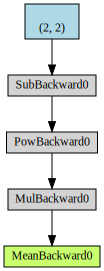

In [ ]:
from torchviz import make_dot

make_dot(f)

In [ ]:
f.backward()
print(x, x.grad, 3*2*(x - 2)/4)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True) tensor([[-1.5000,  0.0000],
        [ 1.5000,  3.0000]]) tensor([[-1.5000,  0.0000],
        [ 1.5000,  3.0000]], grad_fn=<DivBackward0>)


In [ ]:
x += 1 # будет ошибка - inplace-операции не работают
f.grad, y.grad # тут тоже ничего нет !!! (не было requires_grad=True - по этим переменным не бралась производная)

(None, None)

In [ ]:
x = torch.Tensor([1, 2, 3])
w = torch.tensor([1., 1, 1], requires_grad=True)
z = w @ x
z.backward()
print(x.grad, # по этому не указывали возможность взятия градиента
      w.grad, #  должен выводиться x
      sep='\n')

None
tensor([1., 2., 3.])


In [ ]:
z = w @ x
z.backward()
print(x.grad,
      w.grad, # идёт накопление!!!
      sep='\n')

None
tensor([2., 4., 6.])


In [ ]:
with torch.no_grad(): # нет накопления
    z = w @ x
    # z.backward()
print(x.grad, w.grad, sep='\n')

w.grad.data.zero_() # а так - совсем обнулить
z = w @ x
z.backward()
print(x.grad, w.grad, sep='\n')

None
tensor([2., 4., 6.])
None
tensor([1., 2., 3.])


In [ ]:
# w.numpy() - будет ошибка
w.detach().numpy() # создаётся копия, которую можно в np - у неё requires_grad=False

array([1., 1., 1.], dtype=float32)

In [ ]:
# Иллюстрация взятия градиента - без detach

# from torch.autograd import Variable
# x = Variable(torch.Tensor([2]), requires_grad=True)
x = torch.tensor([2.], requires_grad=True)

y = x * x
z = x * y

z.backward()

print(x.grad) # (x^3)' = 3x^2

tensor([12.])


In [ ]:
# Иллюстрация взятия градиента - теперь с detach

# from torch.autograd import Variable
# x = Variable(torch.Tensor([2]), requires_grad=True)
x = torch.tensor([2.], requires_grad=True)

y = x * x
y.detach_() # добавили
z = x * y
# а тут не сработает
z.backward()

print(x.grad) # (2*2*x)' = 4

tensor([4.])


In [ ]:
# ещё одна иллюстрация detach()
import torch
x = torch.tensor([2.], requires_grad=True)
print(x)
print(x.detach())

tensor([2.], requires_grad=True)
tensor([2.])


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=91fb50e1e447dbee75ad5783ba260c5e2f457238b8a943a4fdf5e8220e795bef
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


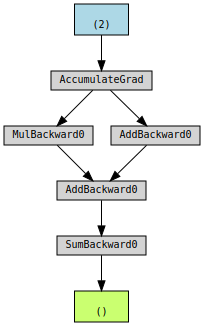

In [2]:
# ещё иллюстрация detach()  с визуализацией
!pip install torchviz
import torch
from torchviz import make_dot
x=torch.ones(2, requires_grad=True)
y=2 * x
z=3 + x
r=(y + z).sum()
make_dot(r)

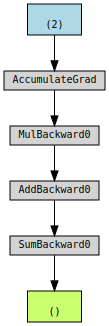

In [4]:
from torchviz import make_dot
x=torch.ones(2, requires_grad=True)
y=2 * x
z=3 + x.detach()
r=(y + z).sum()
make_dot(r)

In [ ]:
# листья графа

a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(4.0)
c = a + b # => tensor(6., grad_fn=<AddBackward0>)

a.requires_grad # => True
a.is_leaf # => True

b.requires_grad # => False
b.is_leaf # => True

c.requires_grad # => True
c.is_leaf # => False

In [ ]:
# динамический граф вычислений в цикле

x = torch.tensor([[1, 2], [3, 4]], requires_grad=True, dtype=torch.float32)
x0 = x
for _ in range(2):
    x = x * x

z = x.mean() # здесь будет 1/4 !!!
z.backward()

print(x, '\n', x.grad)
print(x0, '\n', x0.grad) # градиент лежит здесь!!!
# поскольку x превратился во внутреннюю вершину графа вычислений

tensor([[  1.,  16.],
        [ 81., 256.]], grad_fn=<MulBackward0>) 
 None
tensor([[1., 2.],
        [3., 4.]], requires_grad=True) 
 tensor([[ 1.,  8.],
        [27., 64.]])


<ipython-input-123-7397ba33abd6>:11: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  print(x, '\n', x.grad)


Возможность вычислять отдельные производные.

см. также https://stackoverflow.com/questions/43451125/pytorch-what-are-the-gradient-arguments

In [ ]:
# from torch.autograd import Variable
import torch

x = torch.tensor([[1., 2, 3, 4]], requires_grad=True)
# x = Variable(torch.FloatTensor([[1, 2, 3, 4]]), requires_grad=True)
z = x ** 2 / 2
loss = z.sum(dim=1)

# backward для первого элемента z
z.backward(torch.FloatTensor([[1, 0, 0, 0]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_() # grad <-0 для верности вывода

# backward для второго элемента z
z.backward(torch.FloatTensor([[0, 1, 0, 0]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_()

# backward для всех элементов z с равными весами
z.backward(torch.FloatTensor([[1, 1, 1, 1]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_()

# обычный backward для loss
loss.backward() # ~ loss.backward(torch.FloatTensor([1.0]))
print(x.grad.data)

tensor([[1., 0., 0., 0.]])
tensor([[0., 2., 0., 0.]])
tensor([[1., 2., 3., 4.]])
tensor([[1., 2., 3., 4.]])


In [ ]:
# два обратных прохода по графу

import torch
#from torch.autograd import Variable
#a = Variable(torch.rand(1, 4), requires_grad=True)
a = torch.rand(1, 4, requires_grad=True)
b = a**2
c = b*2
d = c.mean()
e = c.sum()

# если так
d.backward() #
e.backward() # тут будет ошибка
# RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

# надо так
d.backward(retain_graph=True) #
e.backward(retain_graph=True) #

Есть возможность вычисления Jacobian Product $v^TJ$
**- про это пока не говорим**

## Простой пример обучения - пока без НС

In [ ]:
# полиномиальная регрессия

import numpy as np
import torch

w = torch.tensor(torch.randn([3, 1]), requires_grad=True)

opt = torch.optim.Adam([w], 0.1)

def model(x):
    # полином
    f = torch.stack([x * x, x, torch.ones_like(x)], 1)
    yhat = torch.squeeze(f @ w, 1)
    return yhat

#def compute_loss(y, yhat):
#    # ошибка
#    loss = torch.nn.functional.mse_loss(yhat, y)
#    return loss

# а можно так
compute_loss = torch.nn.MSELoss()

def generate_data():
    # данные
    x = torch.rand(100) * 2 - 1.0
    y = 2 * x * x + x + 0.
    return x, y

def train_step():
    x, y = generate_data()

    yhat = model(x)
    loss = compute_loss(y, yhat)

    opt.zero_grad()
    loss.backward()
    opt.step()

for _ in range(1000):
    train_step()

print(w.detach().numpy())

<ipython-input-118-1e984e1a3eab>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  w = torch.tensor(torch.randn([3, 1]), requires_grad=True)


[[1.9999995e+00]
 [1.0000000e+00]
 [1.5245234e-07]]


In [ ]:
# а теперь в стиле нейросети
import torch

class Net(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.a = torch.nn.Parameter(torch.rand(1))
        self.b = torch.nn.Parameter(torch.rand(1))
        self.c = torch.nn.Parameter(torch.rand(1))

    def forward(self, x):
        yhat = self.a * x * x + self.b * x + self.c
        return yhat

net = Net()
# y = net(x)

def train_step(model):
    x, y = generate_data()

    yhat = model(x)
    loss = compute_loss(y, yhat)

    opt.zero_grad()
    loss.backward()
    opt.step()
    # print (loss.item())

opt = torch.optim.Adam(net.parameters(), 0.1)

for _ in range(1000):
    train_step(net)

In [ ]:
for p in net.parameters():
    print(p)

Parameter containing:
tensor([2.], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)
Parameter containing:
tensor([1.1171e-12], requires_grad=True)
